# Projet : Forage de données IFT870

**Groupe 4**

|  Prénom  |    Nom   |    CIP   |  Matricule |
|----------|----------|----------|------------|
| Honorine | CHANTRE  | CHAH2807 | 21 117 462 |
| Manon    | COTTART  | COTM3313 | 21 126 210 |
| Lucas    | GONTHIER | GONL3002 | 21 155 376 |
| Étienne  | PENELLE  | PENE2002 | 16 114 642 |



# Analyse et description des images

Ce notebook recense des méthodes, démarches entreprises et graphiques liés à l'analyse des données-image brutes référant aux parties Description des données de la Partie 1 et Analyse des données de la Partie 2 du rapport. On utilisera dans ce notebook à la fois les images en .png et les images en .mat. 

Les différentes analyses sont les suivantes : 
- Mise en évidence de la structure des images en .png et en .mat
- Affichage de la distribution de chaque classe
- Affichage de certaines caractéristiques des pixels des images (moyenne, variance, etc.)
    - Pour chaque image
    - Pour chaque tumeur de chaque image
- Dsitribution des couleurs 
    - Pour chaque canal de chaque image
    - Pour chaque tumeur de chaque image
- Pourcentage de la surface de la tumeur par rapport à toute l'image
    - Pour toutes les données (moyenne et écart-type)
    - Pour une classe (moyenne et écart-type)
- Coordonnées moyenne de la tumeur pour toutes les données

### Installation des dépendances

In [ ]:
!pip install -r requirements.txt

### Imports

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
from pymatreader import read_mat
import pandas as pd
import cv2
import warnings

### Obtention des données
#### Format png
Il faut aller chercher les images de couleur à l'endroit suivant :
https://www.kaggle.com/denizkavi1/brain-tumor

Ensuite, il faut décompresser le fichier et placer le contenu dans
```dataset/png```. Ce dossier doit contenir 3 dossiers numérotés de 1 à 3.

#### Format mat
Il faut aller chercher les données d'images à l'endroit suivant :
https://figshare.com/articles/dataset/brain_tumor_dataset/1512427/5
Ensuite, il faut décompresser tous les fichiers et tout placer le contenu dans
```dataset/Mat_Format_Dataset```. Ce dernier dossier doit contenir 3064 images numérotées de 1 à 3064.

### Importation de données

Cette partie permet d'importer dans le notebook les données à la fois en .png et en .mat sous forme, respectivement, d'un tableau et d'un dictionnaire pour ainsi effectuer les analyses correspondantes.

In [3]:
# Initialization of the total number of images and class names
nb_images = 3064
class_names = ['Meningioma', 'Glioma', 'Pituitary']

In [4]:
def load_data(type, nb_images=3064):
    """
    This function allows to load data into png or mat format.
    @params: type : the type between mat or png we want to load.
    @params: nb_images : the number of images. 3064 by default.
    @return: if the type is mat, it returns a dictionnary indexed with the number of the class. if the type is png
             it returns a list containing all png images, data[i] contains images of the class i.
    """
    data = {}
    if type == 'mat':
        for i in range(1, nb_images+1):
            dir = "dataset/Mat_Format_Dataset/" + str(i) + ".mat"
            data[i] = read_mat(dir)
        return data
    
    if type == 'png':
        data = [[], [], []]  
        for i in range(len(class_names)):
            dir = "dataset/png/" + str(i+1)
            for path in os.listdir(dir):
                data[i].append(io.imread(dir + "/" + path))
        return data


mat_data = load_data(type='mat')
png_data = load_data(type='png')

### Séparation des données .mat en 3 listes selon leur classe

In [5]:
def separate_mat_data(mat_data):
    """
    This function allows to separate mat data into 3 lists : 1 for each class.
    @params: mat_data : mat data we want to separate.
    @return: 3 lists of mat images.
    """
    list_class1 = []
    list_class2 = []
    list_class3 = []
    
    for i in range(1, len(mat_data)+1):
            
        if mat_data[i]['cjdata']['label'] == 1.0:
            list_class1.append(mat_data[i])
                
        if mat_data[i]['cjdata']['label'] == 2.0:
            list_class2.append(mat_data[i])
                
        if mat_data[i]['cjdata']['label'] == 3.0:
            list_class3.append(mat_data[i])
                
    return list_class1, list_class2, list_class3

list_class1, list_class2, list_class3 = separate_mat_data(mat_data)

### Mise en évidence de la structure des images au format .png

In [6]:
print("Affichage de la 61ième image de la classe Pituitaire : \n")
print(png_data[2][60])
print("\n Les images sont de taille : " + str(len(png_data[2][60])) + " x " + str(len(png_data[2][60][0])))

Affichage de la 61ième image de la classe Pituitaire : 

[[[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 ...

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   2  85 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]]

 Les images sont de taille : 512 x 512


*png_data* est de taille 3 x nombre d'images par classe x 512 x 512 x 4. Dans cette structure, on dispose des valeurs des pixels pour chaque canal R, G et B.

### Mise en évidence de la structure des images au format .mat

In [7]:
print("Affichage la 405ème image : \n")
print(mat_data[405])

Affichage la 405ème image : 

{'cjdata': {'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': 1.0, 'tumorBorder': array([213.02649183, 110.25055279, 202.74889793, 113.98785967,
       197.14293762, 119.12665662, 196.2086109 , 124.73261693,
       192.47130402, 131.74006732, 189.66832387, 137.81319099,
       187.79967043, 144.82064138, 188.73399715, 156.032562  ,
       192.00414067, 162.57284903, 198.07726434, 167.71164598,
       201.34740785, 170.9817895 , 203.68322465, 177.05491317,
       206.4862048 , 181.2593834 , 208.35485824, 183.12803684,
       217.69812543, 185.46385364, 223.7712491 , 185.46385364,
       230.77869949, 187.33250707, 234.98316972, 187.79967043,
       239.65480331, 187.33250707, 242.92494683, 184.06236356,
       248.06374378, 180.32505668, 250.86672393, 177.05491317,
       2

*mat_data* est de taille 3064. Ainsi dans la précédente cellule, on accède à la 405ème image (les indices de mat_data commencent à 1). 
Une image au format .mat contient : 
- un tableau tumorBordel contenant le contour discrétisé des tumeurs sous la forme [x1, y1, x2, y2, …], 
- un tableau image contenant les pixels non normalisés entre 0 et 255 de l'image sur 1 seul canal,
- un label désignant la classe d'appartenance,
- un tableau binaire tumorMask de même dimension que les images au format png (512 x 512), qui contient 1 aux
endroits où se trouve la tumeur.

### Affichage de la distribution de chaque classe

Cette partie permet de voir la distribution des données pour chaque classe.

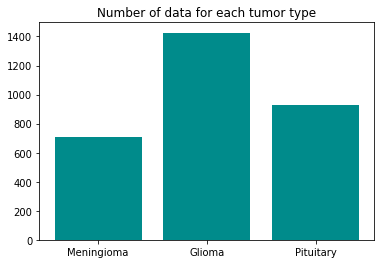

In [8]:
nb_per_class = [len(png_data[0]), len(png_data[1]), len(png_data[2])]
plt.bar(class_names, height=nb_per_class, color='darkcyan')
plt.title('Number of data for each tumor type')
plt.savefig("Bar_data_distribution.png")
plt.show()

On remarque que les classes sont très déséquilibrées.

### Suppression du canal alpha dans les png

Les images en png contiennent non pas 3 canaux mais 4. Le 4ème désigne le canal alpha qui donne une information sur l'opacité ou la transparence de chaque pixel. 

In [ ]:
print(png_data[0])

Les valeurs du canal alpha ont l'air de toutes valoir 255, au moins pour la classe des tumeurs de type Meningiome. Vérifions cela pour toutes les classes.

In [10]:
# Computing the mean of the alpha channel for each image
mean_alpha_channel = []
for i in range(len(png_data)):
    for j in range(len(png_data[i])):
        mean_alpha_channel.append(np.mean(png_data[i][j], axis = (0,1))[3])

# Way to verify if all means are equals to 255
mean_alpha_channel_arr = np.array(mean_alpha_channel)
all_equal = 255 * np.ones(nb_images)
if (mean_alpha_channel_arr == all_equal).all():
    print('Les valeurs du canal alpha pour toutes les images sont toutes égales à 255 !')
else:
    print('Les valeurs du canal alpha pour toutes les images ne sont pas toutes égales à 255 !')

Les valeurs du canal alpha pour toutes les images sont toutes égales à 255 !


Nous pouvons remarquer que toutes les valeurs sont égales à 255, ainsi nous décidons de supprimer cette colonne pour chaque image pour qu'elle n'ait pas d'influence sur les caractéristiques mesurées plus bas.

In [11]:
# We delete the column of the alpha channel for each image
for i in range(len(png_data)):
    for j in range(len(png_data[0])):
        png_data[i][j] = np.delete(png_data[i][j], -1, axis = 2)

### Récupération des valeurs de pixels des images

Cette partie permet de récupérer les valeurs des pixels des images en les normalisant.

In [12]:
# A matrix of size number of classes x nb of images in each class
img_pixel_values = [[], [], []]

for i in range(1, nb_images + 1):
    label = int(mat_data[i]['cjdata']['label'] - 1)
    pixels_non_norm = mat_data[i]['cjdata']['image']
    # Normalization of pixels
    maxpi = np.max(pixels_non_norm)
    minpi = np.min(pixels_non_norm)
    pixel_values_img_norm = (((pixels_non_norm - minpi) / (maxpi - minpi)) * 255).astype(np.uint8)
    # Saving normalized pixels in the matrix
    img_pixel_values[label].append(np.array(pixel_values_img_norm))
    

### Récupération des valeurs de pixels des ROI

Cette partie permet de récupérer les valeurs des pixels des ROI pour chaque image à l'aide du masque fournit dans les images au format .mat pour en faire des analyses.

In [13]:
# A matrix of size number of classes x number of images in each class
roi_pixel_values = [[], [], []]

for i in range(1, nb_images + 1):
    label = int(mat_data[i]['cjdata']['label'] - 1)
    # Product between the pixels and the mask to keep only pixels from ROI
    product_mask_image = mat_data[i]['cjdata']['tumorMask'] * mat_data[i]['cjdata']['image']
    # Recover the coordinates of pixels of ROI in the previous product
    product_mask_image_nonzero = product_mask_image.nonzero()
    # We save the pixels values thanks to the coordinates
    roi_pixel_values_img = []
    for j in range(len(product_mask_image_nonzero[0])):
        roi_pixel_values_img.append(product_mask_image[product_mask_image_nonzero[0][j]][product_mask_image_nonzero[1][j]])
    # Normalization of pixels
    maxpi = np.max(roi_pixel_values_img)
    minpi = np.min(roi_pixel_values_img)
    roi_pixel_values_img_norm = (((roi_pixel_values_img - minpi) / (maxpi - minpi)) * 255).astype(np.uint8)
    # Saving normalized pixels in the matrix
    roi_pixel_values[label].append(np.array(roi_pixel_values_img_norm))
    

### Génération des images en noir et blanc

Cette partie permet de transformer les images png en noir et blanc pour pouvoir calculer le contraste de chaque image.

In [14]:
# A matrix of size number of classes x number of images in each classes
png_data_grey = [ [], [], [] ]
for i in range(len(png_data)):
    for j in range(len(png_data[i])):
        image_grey = cv2.cvtColor(png_data[i][j], cv2.COLOR_BGR2GRAY)
        png_data_grey[i].append(image_grey)

### Affichage de caractéristiques

#### Affichage des caractéristiques pour chaque image au format png

Nous affichons les moyennes totales et pour chaque canal, les variances totales et pour chaque canal ainsi que le contraste pour chaque image pour détecter des tendances selon les classes.

In [15]:
# We create a dataframe containing a column for each feature 
features_img = pd.DataFrame(columns=['Id','Class','Mean_R','Mean_G','Mean_B','Mean','Var_R','Var_G','Var_B','Var','Contrast'])
id_image = 0
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(len(png_data)):
        for j in range(len(png_data[i])):
            mean_tot = np.mean(png_data[i][j]) # Total mean
            var_tot = np.var(png_data[i][j]) # Total variance
            mean_by_chan = np.mean(png_data[i][j], axis = (0,1)) # A tab containing the mean for each channel R, G or B
            var_by_chan = np.var(png_data[i][j], axis = (0,1)) # A tab containing the variance for each channel R, G or B
            contrast_img = png_data_grey[i][j].std() # Contrast
            features_img = features_img.append({'Id' : id_image, 'Class' : i, 'Mean_R' : mean_by_chan[0], 'Mean_G' : mean_by_chan[1], 'Mean_B' : mean_by_chan[2], 'Mean' : mean_tot,
                                       'Var_R' : var_by_chan[0], 'Var_G' : var_by_chan[1], 'Var_B' : var_by_chan[2], 'Var' : var_tot, 'Contrast' : contrast_img}, ignore_index = True)
            id_image += 1

features_img

,Id,Class,Mean_R,Mean_G,Mean_B,Mean,Var_R,Var_G,Var_B,Var,Contrast
0,0.0,0.0,62.503937,47.530018,113.65099,74.561648,98.959343,2010.637466,583.91355,1699.194803,32.169609
1,1.0,0.0,60.984772,49.663212,112.304661,74.317548,129.094792,2546.092121,626.607312,1843.471393,35.446762
2,2.0,0.0,60.949844,50.708069,112.040287,74.566067,170.293238,2712.634587,639.523771,1893.791452,36.268973
3,3.0,0.0,61.791832,48.241348,109.547665,73.193615,155.090036,2942.800783,649.143793,1940.422603,37.449713
4,4.0,0.0,61.222656,48.697399,111.795677,73.905244,125.854385,2534.092404,625.144493,1839.019895,35.37975
...,...,...,...,...,...,...,...,...,...,...,...
3059,3059.0,2.0,57.414688,77.870457,122.987656,128.3182,299.253052,2905.205016,548.788346,6850.555593,35.615961
3060,3060.0,2.0,61.430229,64.179337,124.21558,126.206286,130.19477,1678.879353,421.983017,6716.530203,28.194247
3061,3061.0,2.0,62.264259,62.437584,123.647751,125.837399,140.351683,1634.541697,422.827794,6736.643467,27.808481
3062,3062.0,2.0,61.811695,57.94558,121.544212,124.075372,98.619345,1638.288626,442.946776,6894.358662,28.540685


Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les caractéristiques des différents canaux.

<Figure size 432x288 with 0 Axes>

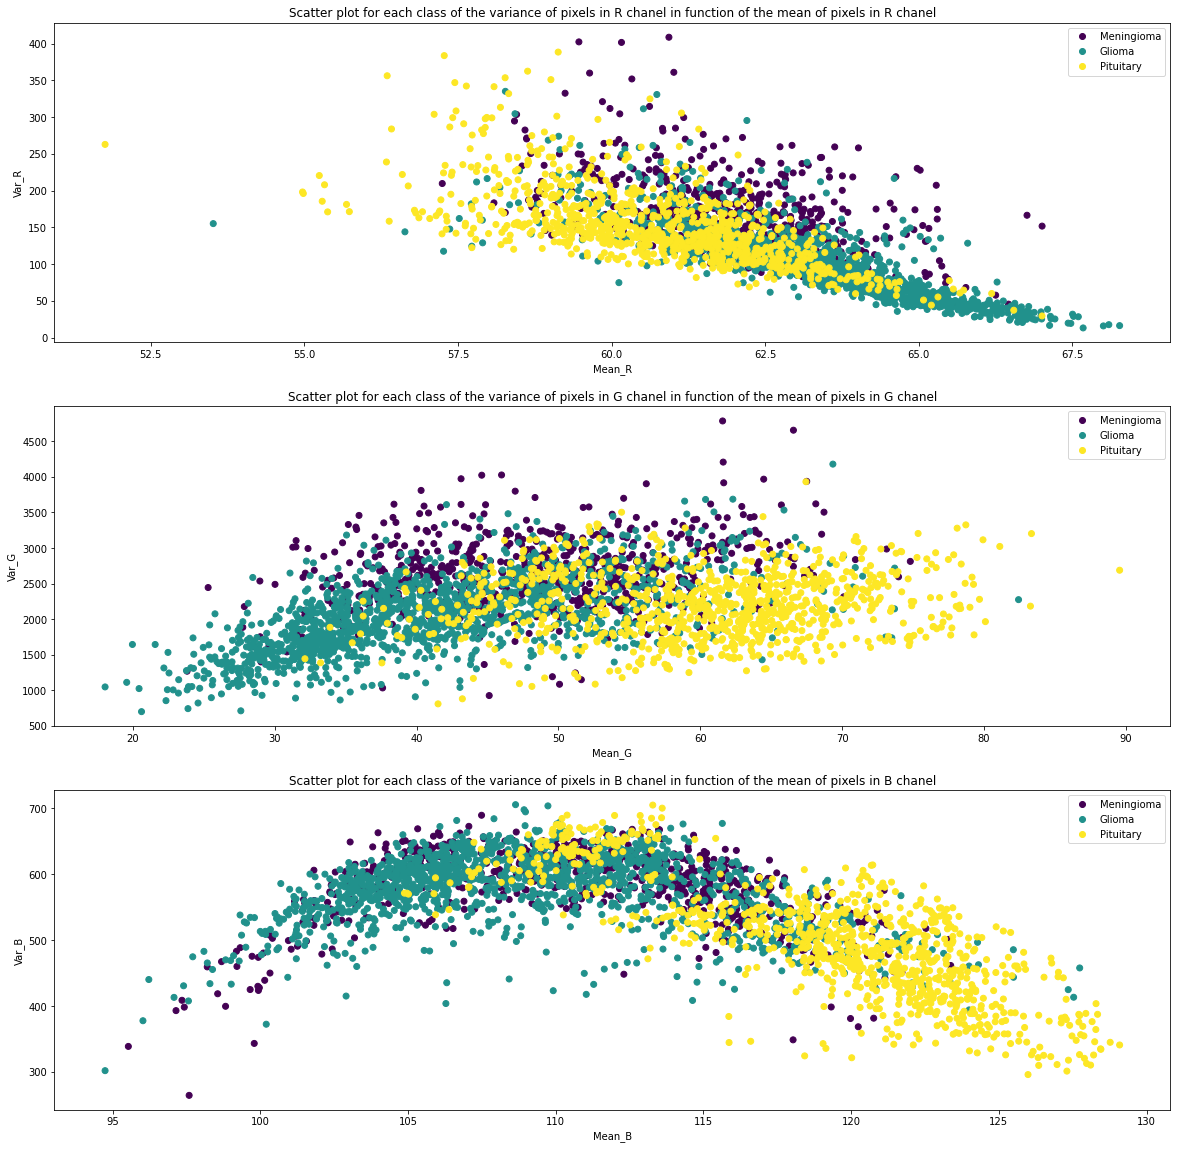

In [16]:
# Plotting the results of the previous dataframe
fig = plt.figure()    
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(20,20))

scatter1 = axs[0].scatter(features_img['Mean_R'], features_img['Var_R'], c = features_img['Class'])
axs[0].set_xlabel('Mean_R')
axs[0].set_ylabel('Var_R')
axs[0].set_title('Scatter plot for each class of the variance of pixels in R chanel in function of the mean of pixels in R chanel')
axs[0].legend(handles=scatter1.legend_elements()[0], labels=class_names)

scatter2 = axs[1].scatter(features_img['Mean_G'], features_img['Var_G'], c = features_img['Class'])
axs[1].set_xlabel('Mean_G')
axs[1].set_ylabel('Var_G')
axs[1].set_title('Scatter plot for each class of the variance of pixels in G chanel in function of the mean of pixels in G chanel')
axs[1].legend(handles=scatter2.legend_elements()[0], labels=class_names)

scatter3 = axs[2].scatter(features_img['Mean_B'], features_img['Var_B'], c = features_img['Class'])
axs[2].set_xlabel('Mean_B')
axs[2].set_ylabel('Var_B')
axs[2].set_title('Scatter plot for each class of the variance of pixels in B chanel in function of the mean of pixels in B chanel')
axs[2].legend(handles=scatter3.legend_elements()[0], labels=class_names)

plt.savefig("scatterplot_images_features.png")

#### Affichage des caractéristiques pour chaque ROI

Nous affichons les moyennes et variances totales pour chaque roi de chaque image pour détecter des tendances selon les classes à l'aide de la récupération des valeurs des pixels des ROI faite plus haut.

In [ ]:
# We create a dataframe containing a column for each feature
features_roi = pd.DataFrame(columns=['Id','Class','Mean','Var'])
id_image = 0
for i in range(len(roi_pixel_values)):
    for j in range(len(roi_pixel_values[i])):
        mean_tot = np.mean(roi_pixel_values[i][j]) # Total mean
        var_tot = np.var(roi_pixel_values[i][j]) # Total variance
        features_roi = features_roi.append({'Id' : id_image, 'Class' : i, 'Mean' : mean_tot, 'Var' : var_tot}, ignore_index = True)
        id_image += 1

features_roi

Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les 2 caractéristiques.

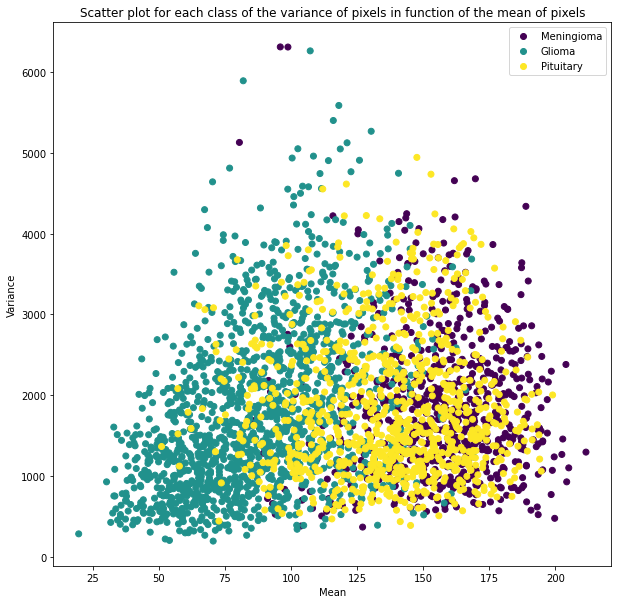

In [18]:
# Plotting the results from the previous dataframe
plt.figure(figsize=(10,10))
scatter = plt.scatter(features_roi['Mean'], features_roi['Var'], c = features_roi['Class'])
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Scatter plot for each class of the variance of pixels in function of the mean of pixels')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.savefig("scatterplot_roi_features.png")
plt.show()

### Distribution des couleurs

Nous allons afficher la distribution des couleurs pour toutes les images et pour toutes les tumeurs afin de voir s'il existe des tendances selon les classes en termes de pixels.

#### Distribution de chaque canal pour toutes les données par classe

On affiche 3 graphiques différents : un par classe. Dans chacun des graphique on fait apparaître la distribution des couleurs pour chaque canal R, G et B.

In [19]:
def generate_histogram(imgs, do_print, hist_title):
    """
    This function allows to generate histograms for a class : 1 for each channel R, G and B.
    @params: imgs: Batch of color images. We calculate the Normalized histogram of this batch.
    @params: do_print: if or not print the resulting histogram.
    @return: will return the rgb histogram for a class.
    """
    red_hist = np.zeros([256])
    green_hist = np.zeros([256])
    blue_hist = np.zeros([256])
    
    for img in imgs:
        for x_pixel in range(img.shape[0]):
            for y_pixel in range(img.shape[1]):
                red_pixel_value = int(img[x_pixel, y_pixel, 0])
                green_pixel_value = int(img[x_pixel, y_pixel, 1])
                blue_pixel_value = int(img[x_pixel, y_pixel, 2])
                # We count the number of pixels that are in the images for each valid pixel value from 0 to 255
                red_hist[red_pixel_value] += 1
                green_hist[green_pixel_value] += 1
                blue_hist[blue_pixel_value] += 1
            
    if do_print:
        print_histogram(red_hist, green_hist, blue_hist, title=hist_title)
    return red_hist, green_hist, blue_hist
  
def print_histogram(red_histogram, green_histogram, blue_histogram, title):
    """
    This function allows to display the rgb histogram.
    @params: red_histogram: the generated histogram for channel R. 
    @params: green_histogram: the generated histogram for channel G.
    @params: blue_histogram: the generated histogram for channel B.
    @display: will display the rgb histogram.
    """
    plt.figure()
    plt.title(title)
    plt.plot(red_histogram, color='#ef476f')
    plt.plot(green_histogram, color='#34eb40')
    plt.plot(blue_histogram, color='#344feb')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig(title)

In [20]:
# meningioma_red_hist, meningioma_green_hist, meningioma_blue_hist = generate_histogram(png_data[0], True, hist_title='Meningioma Intensity Histogram')
# glioma_red_hist, glioma_green_hist, glioma_blue_hist = generate_histogram(png_data[1], True, hist_title='Glioma Intensity Histogram')
# pituitary_red_hist, pituitary_green_hist, pituitary_blue_hist = generate_histogram(png_data[2], True, hist_title='Pituitary Intensity Histogram')

#### Distribution de la couleur sur la ROI (pour toutes les données et par classe)

On affiche 3 graphiques différents : un par classe. Les valeurs des pixels pour les ROI proviennent des images au format .mat dans lesquelles nous avons accès aux valeurs pour un seul canal. Dans chaque graphique, on fait alors apparaître la distribution des couleurs pour cet unique canal.

In [21]:
print(len(roi_pixel_values[0][3]))

8897


ROI
meningioma
glioma
pituitary
Full image
meningioma
glioma
pituitary


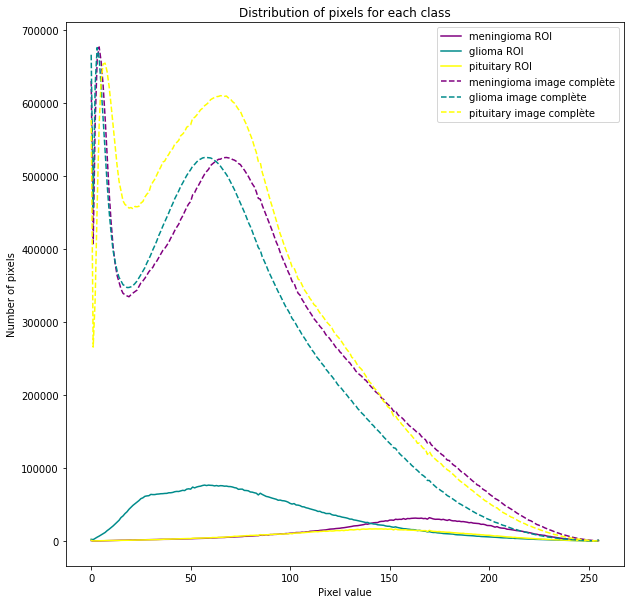

In [32]:
# This code is inspired by the one of the function generate_histogram

# # We count the number of pixels that are in the ROI for each valid pixel value from 0 to 255
hist_meningioma_roi = np.zeros([256])
hist_glioma_roi = np.zeros([256])
hist_pituitary_roi = np.zeros([256])
# iteration sur chaque classe
print('ROI')
for i in range(len(roi_pixel_values)):
    if i == 0:
        print('meningioma')
        hist = hist_meningioma_roi
    elif i == 1:
        print('glioma')
        hist = hist_glioma_roi
    else:
        print('pituitary')
        hist = hist_pituitary_roi

    # iteration sur le nombre de donnees par classe
    for j in range(len(roi_pixel_values[i])):
        if j % 100 == 0:
            pass
            # print('donnee ', j, ' sur ', len(roi_pixel_values[i]))
        pixel_values = roi_pixel_values[i][j]
        
        # iteration sur les vaeurs pixels
        for k in range(len(pixel_values)):
            hist[pixel_values[k]] += 1
            

# Normalization because of the imbalance of classes
hist_meningioma_roi_norm = (1426/708)*hist_meningioma_roi
hist_glioma_roi_norm = (1426/1426)*hist_glioma_roi
hist_pituitary_roi_norm = (1426/930)*hist_pituitary_roi

# We count the number of pixels that are in the .mat images for each valid pixel value from 0 to 255   
hist_meningioma_img = np.zeros([256])
hist_glioma_img = np.zeros([256])
hist_pituitary_img = np.zeros([256])
print('Full image')
for i in range(len(img_pixel_values)):
    if i == 0:
        print('meningioma')
        hist = hist_meningioma_img
    elif i == 1:
        print('glioma')
        hist = hist_glioma_img
    else:
        print('pituitary')
        hist = hist_pituitary_img
    for j in range(len(img_pixel_values[i])):
        if j % 100 == 0:
            pass
            # print('donnee ', j, ' sur ', len(img_pixel_values[i]))
            
        pixel_values = img_pixel_values[i][j]
        
        # iteration sur les vaeurs pixels
        for k in range(len(pixel_values)):
            hist[pixel_values[k]] += 1

# # Normalization because of the imbalance of classes
hist_meningioma_img = (1426/708)*hist_meningioma_img
hist_pituitary_img = (1426/930)*hist_pituitary_img

# Plotting the 6 histograms on the same graph to make comparison
plt.figure(figsize=(10,10))
plt.plot(hist_meningioma_roi, color='purple')
plt.plot(hist_glioma_roi, color='darkcyan')
plt.plot(hist_pituitary_roi, color='yellow')
# plt.plot(hist_meningioma_roi_norm, color='purple', linestyle='--')
# plt.plot(hist_glioma_roi_norm, color='darkcyan', linestyle='--')
# plt.plot(hist_pituitary_roi_norm, color='yellow', linestyle='--')
plt.plot(hist_meningioma_img, color='purple', linestyle='--')
plt.plot(hist_glioma_img, color='darkcyan', linestyle='--')
plt.plot(hist_pituitary_img, color='yellow', linestyle='--')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
plt.title('Distribution of pixels for each class')
# plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.legend(labels=['meningioma ROI', 'glioma ROI', 'pituitary ROI', 'meningioma image complète', 'glioma image complète', 'pituitary image complète'])
plt.savefig("Distribution_of_pixels_for_each_class_img_and_roi.png")
plt.show()

Les courbes en pointillés représentent la distribution des pixels pour les images entières au format .mat et les courbes en ligne pleine représentent la distribution des pixels pour les roi.

### Pourcentage de la surface de la tumeur par rapport à toute l'image

Nous allons afficher le pourcentage de la surface de la tumeur par rapport à toute l'image pour chaque tumeur et pour toutes les images afin de voir s'il existe des tendances selon les classes en termes de pourcentage de la surface de la tumeur.

In [23]:
def calculate_percentage_tumor_per_class(list_class):
    """
    This function calculates the percentage of the tumour area for the all image for one class.
    @params: list_class: a list with the mat images of a class
    @return: will return the list of the percentage of the tumour area.
    """
    size_image = 512 * 512
    list_percentage_per_class = []
    
    for i in range(len(list_class)):
        size_tumor_i = list_class[i]['cjdata']['tumorMask'].sum()
        percentage_tumor_i = size_tumor_i / size_image * 100
        list_percentage_per_class.append(percentage_tumor_i)
    
    return list_percentage_per_class

On calcule la liste du pourcentage de la tumeur par rapport à toute l'image pour chaque classe. 

In [24]:
percentage_class1 = calculate_percentage_tumor_per_class(list_class1)
percentage_class2 = calculate_percentage_tumor_per_class(list_class2)
percentage_class3 = calculate_percentage_tumor_per_class(list_class3)
percentage_all_data = calculate_percentage_tumor_per_class(list_class1 + list_class2 + list_class3)

#### Moyenne du pourcentage de la surface de la tumeur

On affiche sur un graphique la moyennne du pourcentage de la surface de la tumeur pour chaque classe puis pour toutes les données.

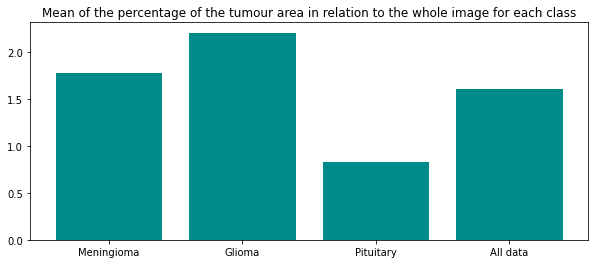

In [25]:
class_names_all = class_names + ['All data']

# Calculating the mean for each class and for all data
percentage_class1_mean = np.mean(percentage_class1)
percentage_class2_mean = np.mean(percentage_class2)
percentage_class3_mean = np.mean(percentage_class3)
# moyenne des moyennes
percentage_all_data_mean = (percentage_class1_mean + percentage_class2_mean + percentage_class3_mean)/3

# Creating a list with all the 4 values of the mean
list_mean = []
list_mean.append(percentage_class1_mean)
list_mean.append(percentage_class2_mean)
list_mean.append(percentage_class3_mean)
list_mean.append(percentage_all_data_mean)

# Plotting the value of each mean for each class and for all data
plt.figure(figsize=(10,4))  
plt.bar(class_names_all, height=list_mean, color = 'darkcyan')
plt.title('Mean of the percentage of the tumour area in relation to the whole image for each class')
plt.savefig("mean_percentage_tumor_area.png")
plt.show()

#### Ecart-type du pourcentage de la surface de la tumeur

On affiche sur un graphique l'écart-type du pourcentage de la surface de la tumeur pour chaque classe puis pour toutes les données.

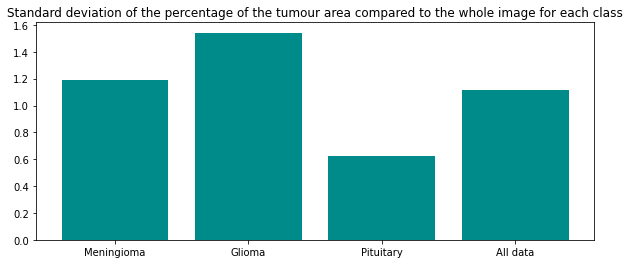

In [26]:
# Calculating the standard deviation for each class and for all data
percentage_class1_std = np.std(percentage_class1)
percentage_class2_std = np.std(percentage_class2)
percentage_class3_std = np.std(percentage_class3)
percentage_all_data_std = (percentage_class1_std + percentage_class2_std + percentage_class3_std)/3

# Creating a list with all the 4 values of the standard deviation
list_std = []
list_std.append(percentage_class1_std)
list_std.append(percentage_class2_std)
list_std.append(percentage_class3_std)
list_std.append(percentage_all_data_std)

# Plotting the value of each standard deviation for each class and for all data
plt.figure(figsize=(10,4))  
plt.bar(class_names_all, height=list_std, color = 'darkcyan')
plt.title('Standard deviation of the percentage of the tumour area compared to the whole image for each class')
plt.savefig("variance_percentage_tumor_area.png")
plt.show()

### Localisation de la moyenne de la tumeur

Nous allons calculer la localisation de la moyenne chaque tumeur afin de voir s'il existe des tendances selon les classes en termes moyenne de la tumeur.

In [27]:
def calculate_mean_tumor_per_class(list_class):
    """
    This function calculates the location of the mean tumour for one class.
    @params: list_class: a list with the mat images of a class
    @return: 2 lists with the location of the mean tumour, one for the x-coordinates and one for the y-coordinates.
    """
    list_mean_tumor_per_class_coord_x = []
    list_mean_tumor_per_class_coord_y = []
    
    for i in range(len(list_class)):
        array_tumorBorder_i = list_class[i]['cjdata']['tumorBorder']
        array_tumorBorder_ix = array_tumorBorder_i[0:len(array_tumorBorder_i):2]    
        array_tumorBorder_iy = array_tumorBorder_i[1:len(array_tumorBorder_i):2]
        mean_tumor_ix = array_tumorBorder_ix.sum() / len(array_tumorBorder_ix)
        mean_tumor_iy = array_tumorBorder_iy.sum() / len(array_tumorBorder_iy)
        list_mean_tumor_per_class_coord_x.append(mean_tumor_ix)
        list_mean_tumor_per_class_coord_y.append(mean_tumor_iy)
    
    return list_mean_tumor_per_class_coord_x, list_mean_tumor_per_class_coord_y

On calcule les listes des coordonnées x, y de la moyenne de la tumeur pour chaque classe. 

In [28]:
mean_tumor_class1_coord_x, mean_tumor_class1_coord_y = calculate_mean_tumor_per_class(list_class1)
mean_tumor_class2_coord_x, mean_tumor_class2_coord_y = calculate_mean_tumor_per_class(list_class2)
mean_tumor_class3_coord_x, mean_tumor_class3_coord_y = calculate_mean_tumor_per_class(list_class3)

On créer une liste avec les coordonnées (x,y) de la moyenne de la tumeur pour une donnée et on ajoute sa classe. 

In [29]:
list_coord_class = []
list_coord_class_line = []

for i in range(len(mean_tumor_class1_coord_x)):
    list_coord_class_line.append(mean_tumor_class1_coord_x[i])
    list_coord_class_line.append(mean_tumor_class1_coord_y[i])
    list_coord_class_line.append(1)
    list_coord_class.append(list_coord_class_line)
    list_coord_class_line = []

for i in range(len(mean_tumor_class2_coord_x)):
    list_coord_class_line.append(mean_tumor_class2_coord_x[i])
    list_coord_class_line.append(mean_tumor_class2_coord_y[i])
    list_coord_class_line.append(2)
    list_coord_class.append(list_coord_class_line)
    list_coord_class_line = []

for i in range(len(mean_tumor_class3_coord_x)):
    list_coord_class_line.append(mean_tumor_class3_coord_x[i])
    list_coord_class_line.append(mean_tumor_class3_coord_y[i])
    list_coord_class_line.append(3)
    list_coord_class.append(list_coord_class_line)
    list_coord_class_line = []

Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les coordonnées de la moyenne.

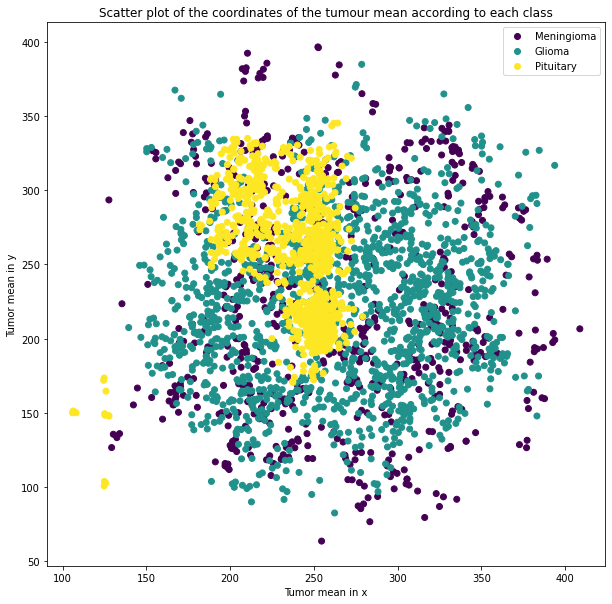

In [30]:
array = np.array(list_coord_class)

# Plotting the coordinantes of the tumour mean according to each class
plt.figure(figsize=(10,10))
plt.title('Scatter plot of the coordinates of the tumour mean according to each class')
scatter = plt.scatter(array[:,0], array[:,1], c = array[:,2])
plt.xlabel("Tumor mean in x")
plt.ylabel("Tumor mean in y")
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.savefig("scatterplot_tumor_mean.png")
plt.show()